## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('titanic.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def null_values(name):
    '''
    This function calculates the null value count of the column
    
    Arguments:
    c_name : Column name 
    
    Return:
    n_count : count of null values in the column
    '''
    n_count = name.isnull().sum()
    return n_count
    

In [5]:
null_values(df['Survived'])

0

In [6]:
null_values(df['Pclass'])

0

In [7]:
null_values(df['Age'])

177

In [8]:
null_values(df['Sex'])

0

In [9]:
'''
from the above values its clear that there are no missing values for Sex and Ticket class. 
We will ignore the missing values of Age ,but since the column has 177 missing values out of 891 ,
the results will be less reliable '''

'\nfrom the above values its clear that there are no missing values for Sex and Ticket class. \nWe will ignore the missing values of Age ,but since the column has 177 missing values out of 891 ,\nthe results will be less reliable '

# Determine if survival rate is associated to the class of the passenger

In [10]:
t_passenger = len(df['Pclass'])
f_class_count = (df['Pclass'] == 1).sum()
s_class_count = (df['Pclass'] == 2).sum()
t_class_count = (df['Pclass'] == 3).sum()

first_per =  f_class_count / t_passenger * 100
second_per = s_class_count / t_passenger * 100
third_per = t_class_count / t_passenger * 100

print('First class percentage = ', first_per, '\nCount: ', f_class_count)
print('Second class percentage = ', second_per, '\nCount: ', s_class_count)
print('Third class percentage = ', third_per, ' \nCount: ', t_class_count)

First class percentage =  24.242424242424242 
Count:  216
Second class percentage =  20.65095398428732 
Count:  184
Third class percentage =  55.106621773288445  
Count:  491


#### Here we can notice that 55.10% of the passengers are Third class ticket holders , 20.65% are second class and 24.24% are First class ticket holders.

# Calculating the survival rates by Ticket class

In [11]:
survivor_count = df['Survived'].sum()
factor = df.groupby('Pclass')
count_factor = factor['Survived'].sum()
survival_rate = count_factor / survivor_count * 100
print('Survival rates:', survival_rate)
print('Counts: ', count_factor) 

Survival rates: Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64
Counts:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


mentioned above survival rates,shows that The first class represents around 24% of the passengers and close to 40% of the survivors. The second class represents around 20% of the passengers and close  25% of the survivors The third class representes 55% of the passengers and close to 34% of the survivors.

C:\Users\anils\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival by Passenger Class')

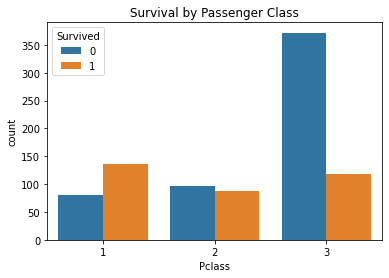

In [12]:
sns.countplot('Pclass',hue='Survived',data=df).set_title('Survival by Passenger Class')

Here we can see that the first class ticket holder has a better survival rate than that of a third class passenger.

# Determine if the survival rate is associated to the gender

In [13]:
survivor_count = df['Survived'].sum()
factor = df.groupby('Sex')
count_factor = factor['Survived'].sum()
survival_rate = count_factor / survivor_count * 100
print('Survival rates:', survival_rate)
print('Counts: ', count_factor)

Survival rates: Sex
female    68.128655
male      31.871345
Name: Survived, dtype: float64
Counts:  Sex
female    233
male      109
Name: Survived, dtype: int64


C:\Users\anils\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival by Gender')

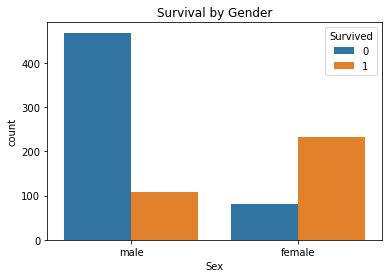

In [14]:
sns.countplot('Sex',hue='Survived',data=df).set_title('Survival by Gender')

above graph shows females had better chance of survival which is 68.12 percent.

# Determine the survival rate is associated to the age

In [15]:
df_age = df[['Age' , 'Survived']].dropna(how='any')
df_age['Age'] = (np.floor(df_age['Age'])).astype(int)
df_age.shape
df_age.head()

,Age,Survived
0,22,0
1,38,1
2,26,1
3,35,1
4,35,0


In [16]:
ages_list = df_age['Age'].unique()
ages_list.sort()
ages_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [17]:
df_survival_age = pd.DataFrame(index=ages_list, columns=['Survived', 'Total', 'Percentage'])

df_survival_age['Survived'] = df_age.groupby('Age')['Survived'].sum()
df_survival_age['Total'] = df_age.groupby('Age').count()
df_survival_age['Percentage'] = round(df_age.groupby('Age')['Survived'].mean() * 100, 2)
df_survival_age.head()

,Survived,Total,Percentage
0,7,7,100.00
1,5,7,71.43
2,3,10,30.00
3,5,6,83.33
4,7,10,70.00


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df_survival_age['Percentage'].index
y = df_survival_age['Percentage']
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

C:\Users\anils\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anils\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

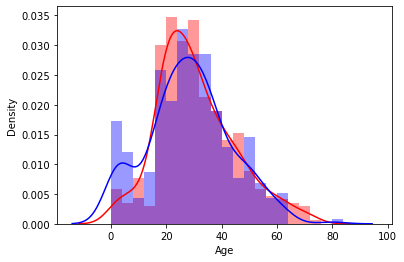

In [18]:
age_bins = np.arange(0, 100, 4)
sns.distplot(df.loc[(df['Survived']==0) & (~df['Age'].isnull()),'Age'], bins=age_bins, color='red')
sns.distplot(df.loc[(df['Survived']==1) & (~df['Age'].isnull()),'Age'], bins=age_bins, color='blue')
plt.title('Age distribution among survival classes')
plt.ylabel('Frequency')
plt.legend(['Death', 'Survived'])
plt.show()

## Github Url for this assignment  https://github.com/raraanil/Python_Assignment3_Part2.git